In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
%matplotlib inline

movies = pd.read_csv("fandango_score_comparison.csv")

movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


(0, 5)

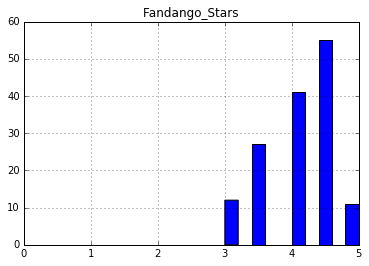

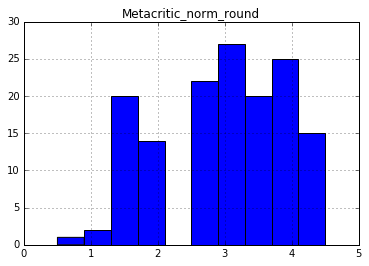

In [2]:
movies.hist(column="Fandango_Stars")
plt.xlim([0,5])
movies.hist(column="Metacritic_norm_round")
plt.xlim([0,5])

Metacrtic scores have a more normal distribution, where as Fandango scores have a negative skew meaning Fandango generally rates movies more highly. In fact within the data Fandango never has a score below 3, where as over a third of the Metatcritic films scores are less than 3.

In [3]:
print("Fandango Mean = %s" % ("{:{prec}f}".format(movies["Fandango_Stars"].mean(), prec=".2")))
print("Metacritic Mean = %s" % ("{:{prec}f}".format(movies["Metacritic_norm_round"].mean(), prec=".2")))
print("Fandango Median = %s" % (movies["Fandango_Stars"].median()))
print("Metacritic Median = %s" % (movies["Metacritic_norm_round"].median()))
print("Fandango Standard Deviation = %s" % ("{:{prec}f}".format(movies["Fandango_Stars"].std(), prec=".2")))
print("Metacritic Standard Deviation = %s" % ("{:{prec}f}".format(movies["Metacritic_norm_round"].std(), prec=".2")))

Fandango Mean = 4.09
Metacritic Mean = 2.97
Fandango Median = 4.0
Metacritic Median = 3.0
Fandango Standard Deviation = 0.54
Metacritic Standard Deviation = 0.99


The standard deviation for Fandango is much lower than Metacritic because Fandango's scores radiate around 4.0-4.5 and don't go below 3 so the variation in scores is much less than Metacritic, which has scores ranging below 1 to greater than 4.

The mean of Fandango scores is much higher than Metacritic because Fandango does not post scores less than 3, likely because they sell tickets on their website and therefore have an incentive to score films highly on their website. Fandango normal distribution around 4.0-4.5, where as Metacritic normal distribution around 3.  

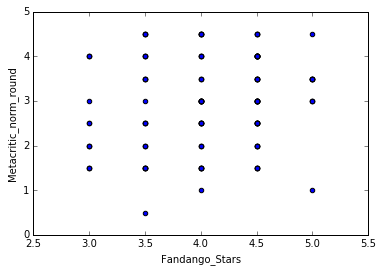

In [4]:
movies.plot.scatter(x="Fandango_Stars",y="Metacritic_norm_round")

In [5]:
movies["fm_diff"] = movies["Fandango_Stars"] - movies["Metacritic_norm_round"]
movies["fm_diff"] = np.absolute(movies["fm_diff"])
movies.sort("fm_diff",axis=0,ascending=0,inplace=True)
print(movies["FILM"].head(5))

3       Do You Believe? (2015)
85           Little Boy (2015)
47                Annie (2014)
19               Pixels (2015)
134    The Longest Ride (2015)
Name: FILM, dtype: object


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [6]:
r_score = pearsonr(movies["Fandango_Stars"],movies["Metacritic_norm_round"])[0]
r_score

0.17844919073895918

The low correlation suggests that the films that Metacritic score highly, which we can assume are more objectively good films, are not necessarily the most highly rated films for Fandango. So we can assume that there is a different reason for the variation in Fanadango's scores other than actual film quality. 

In [10]:
x = movies["Metacritic_norm_round"]
y = movies["Fandango_Stars"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

pred_3 = 3 * slope + intercept
pred_3

4.0917071528212041

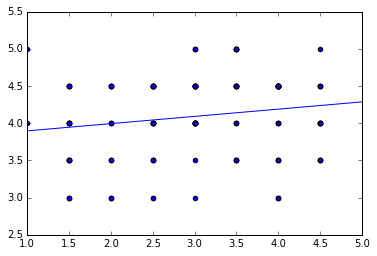

In [14]:
pred_y = []
x_to_predict = [1.0,5.0]

for i in x_to_predict:
    pred_y.append(i * slope + intercept)
    
plt.scatter(x,y)
plt.plot(x_to_predict, pred_y)
plt.xlim([1,5])
plt.show()